In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


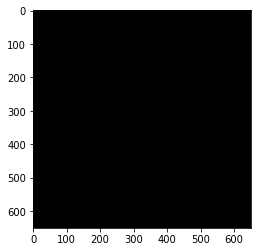

In [ ]:
#creation et sauvegarde d'un masque noir 650x650
import numpy as np
import matplotlib.pyplot as plt
import cv2

black_mask = np.zeros([650,650,3],dtype=np.uint8)
black_mask.fill(0) # or img[:] = 0 
cv2.imwrite('/content/drive/My Drive/Colab_outputs/black_mask.png',black_mask)

plt.imshow(black_mask, cmap='gray', interpolation='None')

In [ ]:
#préparation du dataframe avec les masks
import os
import pandas as pd

image_path=[]
extensions = ('.jpg') 
exclude_directories = set(['bone']) #exclusion des radios des os
for dname, dirs, files in os.walk('/content/drive/My Drive/Projet_AVC/Patients_CT'):  #this loop though directies recursively 
    dirs[:] = [d for d in dirs if d not in exclude_directories] 
    for fname in files:
        if fname.find("HGE_Seg") == -1:
          if(fname.lower().endswith(extensions)): #check for extension 
            fpath = os.path.join(dname, fname)   #this generate full directory path for file
            image_path.append(fpath)
df = pd.DataFrame (image_path, columns = ['filename'])

In [ ]:
#affichage du dataframe avec les chemins aux fichiers images
pd.set_option('display.max_colwidth', None)
df

,filename
0,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/2.jpg
1,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/22.jpg
2,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/25.jpg
3,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/6.jpg
4,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/23.jpg
...,...
2496,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/8.jpg
2497,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/6.jpg
2498,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/4.jpg
2499,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/5.jpg


In [ ]:
# NE PAR REEXECUTER
#création des masques en png
from PIL import Image

for index, row in df.iterrows():
  if row.filename.find("HGE_Seg")!=-1:
    im1 = Image.open(row.filename)
    file_noext = row.filename.rsplit('.', 1)[0] + '.png'
    im1.save(file_noext)

In [ ]:
#on recherche les fichiers dont l'extension est en png
image_path=[]
extensions = ('.png') 
exclude_directories = set(['bone']) #exclusion des radios des os
for dname, dirs, files in os.walk('/content/drive/My Drive/Projet_AVC/Patients_CT'):  #this loop though directies recursively 
    dirs[:] = [d for d in dirs if d not in exclude_directories] 
    for fname in files:
        if(fname.lower().endswith(extensions)): #check for extension 
           fpath = os.path.join(dname, fname)   #this generate full directory path for file
           image_path.append(fpath)
dh = pd.DataFrame (image_path, columns = ['annotation'])

In [ ]:
#check
dh

,annotation
0,/content/drive/My Drive/Projet_AVC/Patients_CT/097/brain/21_HGE_Seg.png
1,/content/drive/My Drive/Projet_AVC/Patients_CT/097/brain/17_HGE_Seg.png
2,/content/drive/My Drive/Projet_AVC/Patients_CT/097/brain/24_HGE_Seg.png
3,/content/drive/My Drive/Projet_AVC/Patients_CT/097/brain/16_HGE_Seg.png
4,/content/drive/My Drive/Projet_AVC/Patients_CT/097/brain/20_HGE_Seg.png
...,...
313,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/15_HGE_Seg.png
314,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/21_HGE_Seg.png
315,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/22_HGE_Seg.png
316,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/23_HGE_Seg.png


In [ ]:
#on delete les HGE_Seg
#annotations_list =[]
#
#for index, row in df.iterrows():
#  if row.filename.find("HGE_Seg")!=-1:
#    annotations_list.append(row.filename)
#    #on drop ces lignes de df
#    df.drop(index, inplace=True)  
#dh = pd.DataFrame (annotations_list, columns = ['annotation'])

In [ ]:
#creation d'une clé commune aux 2 dataframe pour merge
import re

r = re.compile(r"[0-9]+")

key = []
for i in dh.index:
  number = r.findall(dh.annotation[i]) #give the list of PT number and image number
  number = ''.join(number) #join the two numbers
  key.append(number)

image_key = []
for i in df.index:
  number = r.findall(df.filename[i]) #give the list of PT number and image number
  number = ''.join(number) #join the two numbers
  image_key.append(number) 

dh['key'] = key
df['key'] = image_key

In [ ]:
da = df.merge(dh, left_on='key', right_on='key', how='left')

In [ ]:
#on check que tout est ok

da.annotation.count()
#318 non NAN

# on affiche notre sortie
da

,filename,key,annotation
0,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/2.jpg,1292,NaN
1,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/22.jpg,12922,NaN
2,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/25.jpg,12925,NaN
3,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/6.jpg,1296,NaN
4,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/23.jpg,12923,NaN
...,...,...,...
2496,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/8.jpg,0498,NaN
2497,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/6.jpg,0496,NaN
2498,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/4.jpg,0494,NaN
2499,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/5.jpg,0495,NaN


In [ ]:
#on drop la colone key 
da = da.drop('key', axis=1)

#on applique un mask noir pour les images sans masque (non hémorragie)
da['annotation'] = da['annotation'].fillna('/content/drive/My Drive/Colab_outputs/black_mask.png')

In [ ]:
#check for da
da

,filename,annotation
0,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/2.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png
1,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/22.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png
2,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/25.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png
3,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/6.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png
4,/content/drive/My Drive/Projet_AVC/Patients_CT/129/brain/23.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png
...,...,...
2496,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/8.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png
2497,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/6.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png
2498,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/4.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png
2499,/content/drive/My Drive/Projet_AVC/Patients_CT/049/brain/5.jpg,/content/drive/My Drive/Colab_outputs/black_mask.png


In [ ]:
da.to_csv('/content/drive/My Drive/Colab_outputs/path_annotation.csv')